# WBrown INFO-2648 Final Project

# Setup

In [154]:
# import working libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Questions to answer

In [155]:
# 1)  Which year was the most video games produced/released
# 2)  Who is the target audience based on ESRB Rating
# 3)  What are the most popular game genres by year
# 4)  Is there a correlation between votes (count of ratings) and rating (1-10)

# Import Data

In [156]:
# Get IMDB Video game dataset
# downloaded from Kaggle at https://www.kaggle.com/datasets/muhammadadiltalay/imdb-video-games/data
df = pd.read_csv('../FinalProject/datasets/imdb-videogames.csv')

# Explore Dataset

In [157]:
# Get shape of dataset (rows, columns)
df.shape

(20803, 17)

In [158]:
# let's look at the dataset structure
# column names, non-null values, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   20803 non-null  int64  
 1   name         20803 non-null  object 
 2   url          20803 non-null  object 
 3   year         20536 non-null  float64
 4   certificate  7903 non-null   object 
 5   rating       11600 non-null  float64
 6   votes        11600 non-null  object 
 7   plot         20803 non-null  object 
 8   Action       20803 non-null  bool   
 9   Adventure    20803 non-null  bool   
 10  Comedy       20803 non-null  bool   
 11  Crime        20803 non-null  bool   
 12  Family       20803 non-null  bool   
 13  Fantasy      20803 non-null  bool   
 14  Mystery      20803 non-null  bool   
 15  Sci-Fi       20803 non-null  bool   
 16  Thriller     20803 non-null  bool   
dtypes: bool(9), float64(2), int64(1), object(5)
memory usage: 1.4+ MB


In [159]:
# View sample data 
df.head()

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False


# Tidy Data: Is the dataset tidy

In [160]:
# Check for NaN values
df.isnull().sum()

Unnamed: 0         0
name               0
url                0
year             267
certificate    12900
rating          9203
votes           9203
plot               0
Action             0
Adventure          0
Comedy             0
Crime              0
Family             0
Fantasy            0
Mystery            0
Sci-Fi             0
Thriller           0
dtype: int64

# Tidy Data: Drop unused columns

In [161]:
df.drop(['Unnamed: 0', 'url'], axis=1, inplace=True)
df.head()

,name,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,Spider-Man,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,Red Dead Redemption II,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,Grand Theft Auto V,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,God of War,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,Uncharted 4: A Thief's End,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False


# Tidy Data: Clean Votes and Ratings columns

In [162]:
# clean votes column data
# remove comma from votes
df.votes = df.votes.str.replace(',', '') #(removing special characters from numbers)

# Zero fill NaN values
df.votes = df.votes.fillna(0)   #(lets fill na with zero)

# convert votes to integer
df.votes = df.votes.astype('int16')
df.votes = df.votes.abs()

In [163]:
# Clean rating column data
# Zero fill NaN values
df.rating = df.rating.fillna(0)

In [164]:
# let's look at the dataset structure
# column names, non-null values, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         20803 non-null  object 
 1   year         20536 non-null  float64
 2   certificate  7903 non-null   object 
 3   rating       20803 non-null  float64
 4   votes        20803 non-null  int16  
 5   plot         20803 non-null  object 
 6   Action       20803 non-null  bool   
 7   Adventure    20803 non-null  bool   
 8   Comedy       20803 non-null  bool   
 9   Crime        20803 non-null  bool   
 10  Family       20803 non-null  bool   
 11  Fantasy      20803 non-null  bool   
 12  Mystery      20803 non-null  bool   
 13  Sci-Fi       20803 non-null  bool   
 14  Thriller     20803 non-null  bool   
dtypes: bool(9), float64(2), int16(1), object(3)
memory usage: 1.0+ MB


# Tidy Data: Drop rows without year data as it is of no use in this analysis

In [165]:
# Tidy Data
# Drop rows where 'year' is NaN
df = df.dropna(subset=['year'])
df.isnull().sum()

name               0
year               0
certificate    12653
rating             0
votes              0
plot               0
Action             0
Adventure          0
Comedy             0
Crime              0
Family             0
Fantasy            0
Mystery            0
Sci-Fi             0
Thriller           0
dtype: int64

# Tidy Data: Check for duplicate rows based on title and year

In [166]:
# Tidy Data
# Check for duplicate rows based on game title and release year
dupe_rows = df.duplicated(subset=['name','year'])
dupe_count = (dupe_rows == True).sum()
print (' # of Duplicate Rows: ', dupe_count)

 # of Duplicate Rows:  708


In [167]:
# Tidy Data
# Drop duplicate rows, keep most recent (last) row
df.drop_duplicates(subset=['name','year'], keep='last', inplace=True)
dupe_rows = df.duplicated(subset=['name','year'])
dupe_count = (dupe_rows == True).sum()
print (' # of Duplicate Rows: ', dupe_count)

 # of Duplicate Rows:  0


# Tidy Data: Explore ESRB Ratings Data

In [168]:
# Tidy Data
# Get list of ESRB ratings values with counts for each value
df['certificate'].value_counts(dropna=False)

certificate
NaN          12556
T             2306
E             1907
M             1544
E10+           761
Unrated        235
K-A            210
Not Rated      175
AO              32
EC              25
GA              24
CE              13
12               9
PG-13            7
MA-13            6
Approved         4
G                4
MA-17            3
PG               3
TV-MA            2
Passed           1
TV-14            1
Name: count, dtype: int64

In [169]:
# Apply default value for rows where certificate value is NaN, change to 'Unknown'
df.loc[df['certificate'].isnull(), 'certificate'] = 'Unknown'
df['certificate'].value_counts(dropna=False)

certificate
Unknown      12556
T             2306
E             1907
M             1544
E10+           761
Unrated        235
K-A            210
Not Rated      175
AO              32
EC              25
GA              24
CE              13
12               9
PG-13            7
MA-13            6
Approved         4
G                4
MA-17            3
PG               3
TV-MA            2
Passed           1
TV-14            1
Name: count, dtype: int64

In [170]:
# Remove rows with ratings values that do not match ESRB rating values (E, E10+, T, M, AO)
# Define list of values to remove, this list is likely from other countries ratings system
values_to_remove = ['K-A', 'GA', 'EC', 'CE', '12', 'MA-13', 'PG-13', 'Approved', 'G', 'MA-17', 'PG', 'TV-MA', 'Passed', 'TV-14']

# Remove rows where column 'certificate' is in the list of values to remove
df = df[~df['certificate'].isin(values_to_remove)]
# Get list of updated  value counts for ESRB ratings/certificate
df['certificate'].value_counts(dropna=False)

certificate
Unknown      12556
T             2306
E             1907
M             1544
E10+           761
Unrated        235
Not Rated      175
AO              32
Name: count, dtype: int64

In [171]:
# Update values in the 'certificate' column where value is 'Not Rated', change to 'Unrated'
df.loc[df['certificate'] == 'Not Rated', 'certificate'] = 'Unrated'
# Get list of updated  value counts for ESRB ratings/certificate
df['certificate'].value_counts(dropna=False)

certificate
Unknown    12556
T           2306
E           1907
M           1544
E10+         761
Unrated      410
AO            32
Name: count, dtype: int64

In [172]:
df.head()

,name,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
10,Ghost of Tsushima,2020.0,M,9.3,8452,"Set in 1274 on the Tsushima Island, the last s...",True,True,False,False,False,False,False,False,False
13,Uncharted: Drake's Fortune,2007.0,T,8.5,20343,"Treasure hunter Nathan Drake, embarks in the a...",True,True,False,False,False,True,False,False,False
15,God of War: Ragnarök,2022.0,M,0.0,0,Kratos and his son Atreus face the oncoming No...,True,True,False,False,False,False,False,False,False
19,Far Cry 3,2012.0,M,8.9,18775,"While skydiving, Jason Brody and his friends l...",True,True,False,False,False,False,False,False,False
29,Fallout: New Vegas,2010.0,M,8.9,12296,"After surviving a bullet to the head, Courier ...",True,True,False,False,False,False,False,True,False


In [173]:
# Let's focus on data from this century for our questions/visualizations
# let's look at the dataset structure after data wrangling
# column names, non-null values, and data types
df = df[(df['year'] >= 2000) & (df['year'] < 2025)]
df.shape

(13611, 15)

# Let's answer some questions

# Number of games released by year

In [174]:
# Group by 'year', perform count of rows, and sort by count value
count_by_year_df = df.groupby('year').size().reset_index(name='count').sort_values(by='count', ascending=False)
count_by_year_df

,year,count
19,2019.0,926
18,2018.0,839
17,2017.0,825
16,2016.0,791
15,2015.0,722
20,2020.0,690
21,2021.0,669
14,2014.0,635
13,2013.0,631
12,2012.0,606


Text(0.5, 1.0, 'Number of Games released by Year')

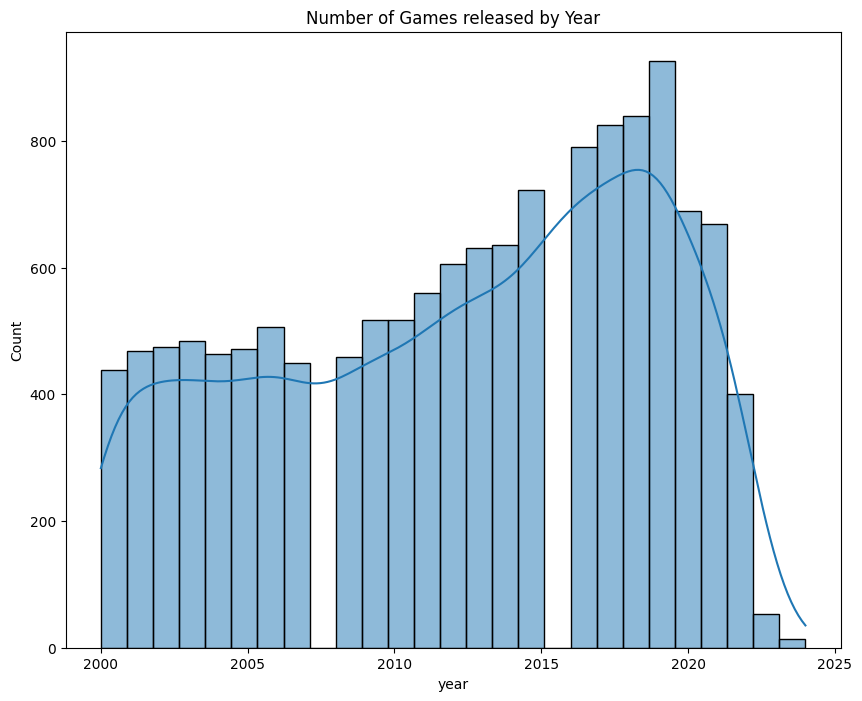

In [175]:
# plot the number of games released year
plt.figure(figsize= (10,8))
sns.histplot(x='year', data= df, kde= True)
plt.title('Number of Games released by Year')

# Target Audience based on ESRB rating

In [176]:
# 3)  Who is the target audience based on ESRB Rating
# Group by rating 'certificate', perform count of rows, and sort by count value
# Exclude 'Unknown' ratings values
count_by_rating_df = df[~(df['certificate'] == 'Unknown')].groupby('certificate').size().reset_index(name='count').sort_values(by='count', ascending=False)
count_by_rating_df

,certificate,count
4,T,1919
1,E,1458
3,M,1371
2,E10+,730
5,Unrated,57
0,AO,11


Text(0.5, 1.0, 'Target Audience based on ESRB rating')

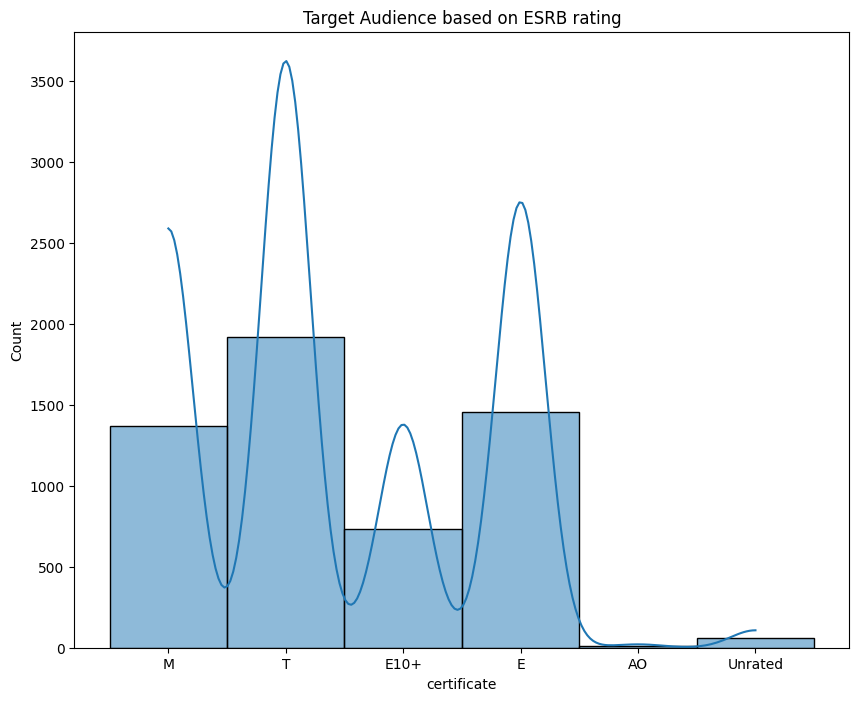

In [177]:
# plot the number of games by ratings value
plt_df = df[~(df['certificate'] == 'Unknown')]
plt.figure(figsize= (10,8))
sns.histplot(x='certificate', data= plt_df, kde= True)
plt.title('Target Audience based on ESRB rating')

# What are the most popular game genres by year

In [178]:
genre_by_year_df = df[['year', 'Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy',
                    'Mystery', 'Sci-Fi', 'Thriller']].groupby('year').sum()
genre_by_year_df

,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
year,,,,,,,,,
2000.0,279,228,43,16,98,88,21,70,7
2001.0,285,259,42,29,94,110,24,77,9
2002.0,333,255,38,23,67,119,27,64,10
2003.0,334,257,53,19,68,120,24,67,10
2004.0,318,264,41,32,63,107,31,57,15
2005.0,338,264,39,38,59,97,23,64,18
2006.0,329,273,44,32,88,106,25,53,13
2007.0,268,233,43,29,77,106,33,52,14
2008.0,255,255,51,23,57,101,30,55,17


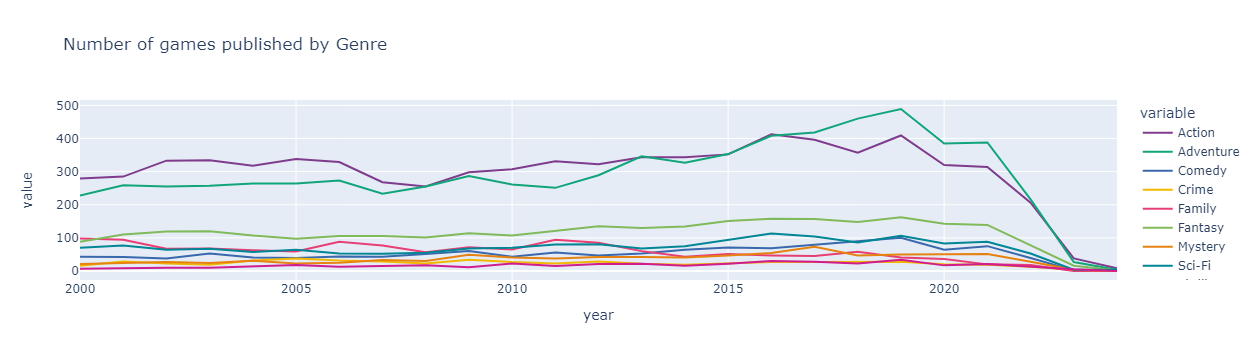

In [179]:
# found this visualization online. thought I would include here because of it's impact
# plot the number games release for each genre over a period of time
fig = px.line(genre_by_year_df, x=genre_by_year_df.index, y=genre_by_year_df.columns, 
              title='Number of games published by Genre', color_discrete_sequence=px.colors.qualitative.Bold)
fig.show()

# Is there a correlation between votes (count of ratings) and rating (1-10)

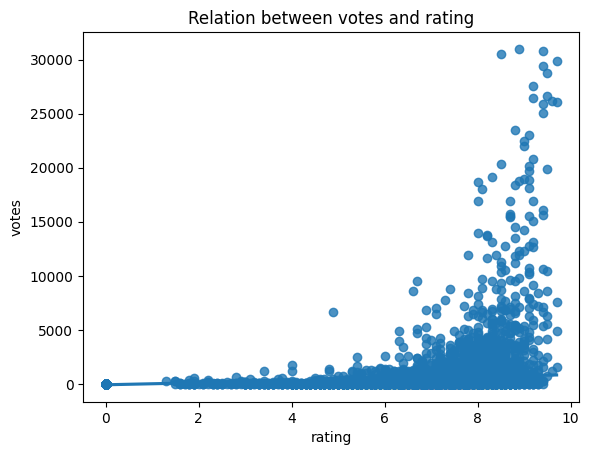

In [180]:
# Relationship between number of votes (number of ratings submitted) and the ratigs
plt.Figure(figsize=(12, 12))
sns.regplot(x='rating', y='votes', data=df)
plt.title('Relation between votes and rating')
plt.show()